In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
dataset.duplicated().sum()

0

In [10]:
mapi={'Male':1,'Female':0}
dataset = dataset.replace(mapi)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [11]:
dataset.drop(['User ID'],axis=1,inplace=True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [13]:
x,y=dataset.drop(['Purchased'],axis=1),dataset['Purchased']

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()

In [36]:
xtrain=sc_scale.fit_transform(xtrain)
xtest=sc_scale.transform(xtest)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

In [39]:
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [40]:
y_pred=classifier.predict(xtest)

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)



In [44]:
print("Confusion Matrix:\n" ,cm)

Confusion Matrix:
 [[65  3]
 [ 7 25]]


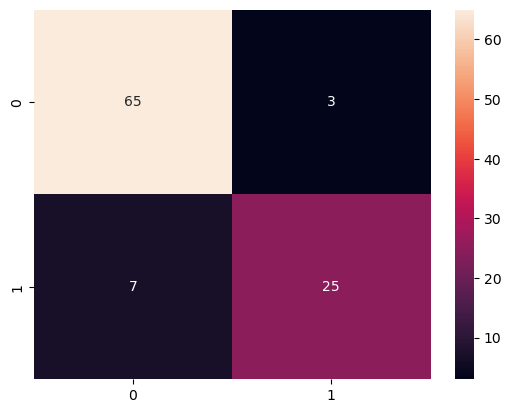

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(ytest,y_pred)*100,'%')

accuracy:  90.0 %


In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [49]:
precision=precision_score(ytest,y_pred)
print('Precision: %f'%precision)
recall=recall_score(ytest,y_pred)
print('Recall: %f'%recall)
f1=f1_score(ytest,y_pred)
print('F1 score: %f'%f1)



Precision: 0.892857
Recall: 0.781250
F1 score: 0.833333
